## Importing the necessary libraries.

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
from scipy import stats
from sklearn.impute import SimpleImputer as imputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import export_graphviz 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

## Loading the dataset.

In [2]:
df = pd.read_csv('./dataset/house-prices.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.drop(['Id'], inplace = True, axis = 1)

In [5]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
df.shape

(1460, 80)

## Data cleaning.

### Finding some null values that aren't detected by Pandas.

In [7]:
null_values_dict = {
    "?": np.nan,
    "--": np.nan,
    "-": np.nan
}
df.replace(null_values_dict, inplace=True)

<AxesSubplot:>

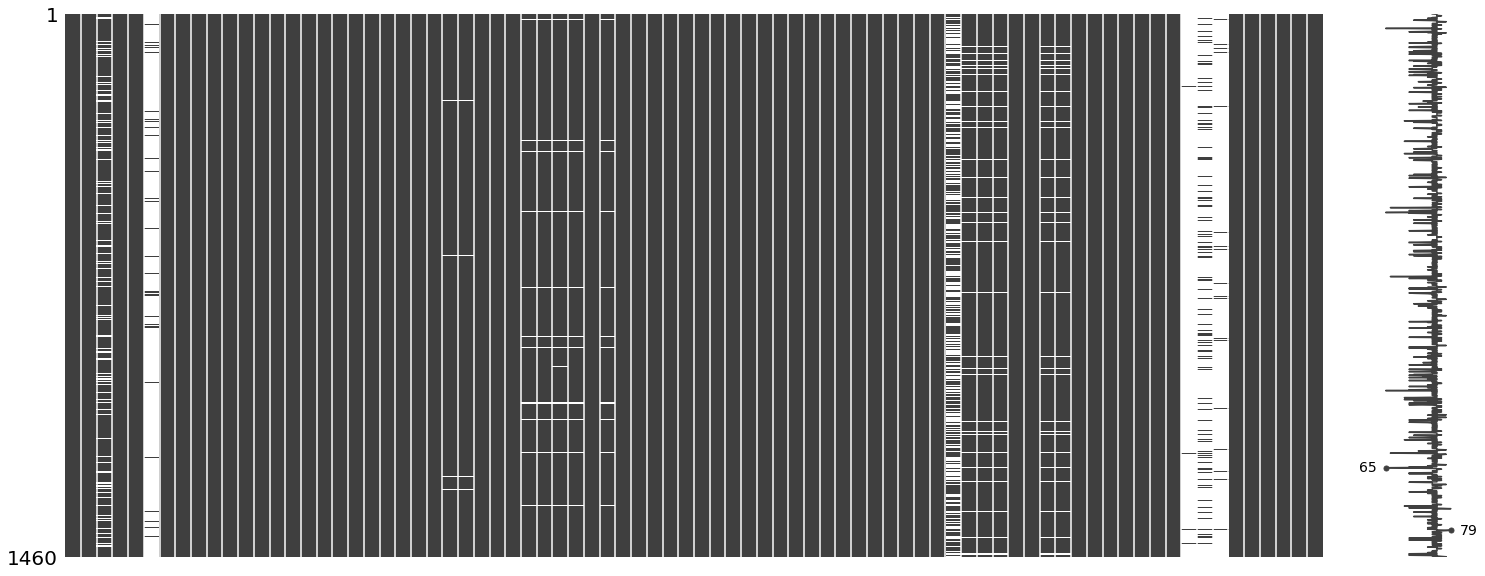

In [8]:
msno.matrix(df)

### Some columns have over 17% null values, so rather than filling so many null values, I opt to simply delete those columns.

In [9]:
print(f"Initial shape : {df.shape}")
for col in df:
    percentage_null = df[col].isnull().sum() * 100 / df.shape[0]
    # print(f"{percentage_null}%", col)
    if percentage_null > 17 : 
        df.drop(col, axis=1, inplace=True)
print(f"Shape after removing columns having excessive null values : {df.shape}")

Initial shape : (1460, 80)
Shape after removing columns having excessive null values : (1460, 74)


### Now check out the null value matrix...

<AxesSubplot:>

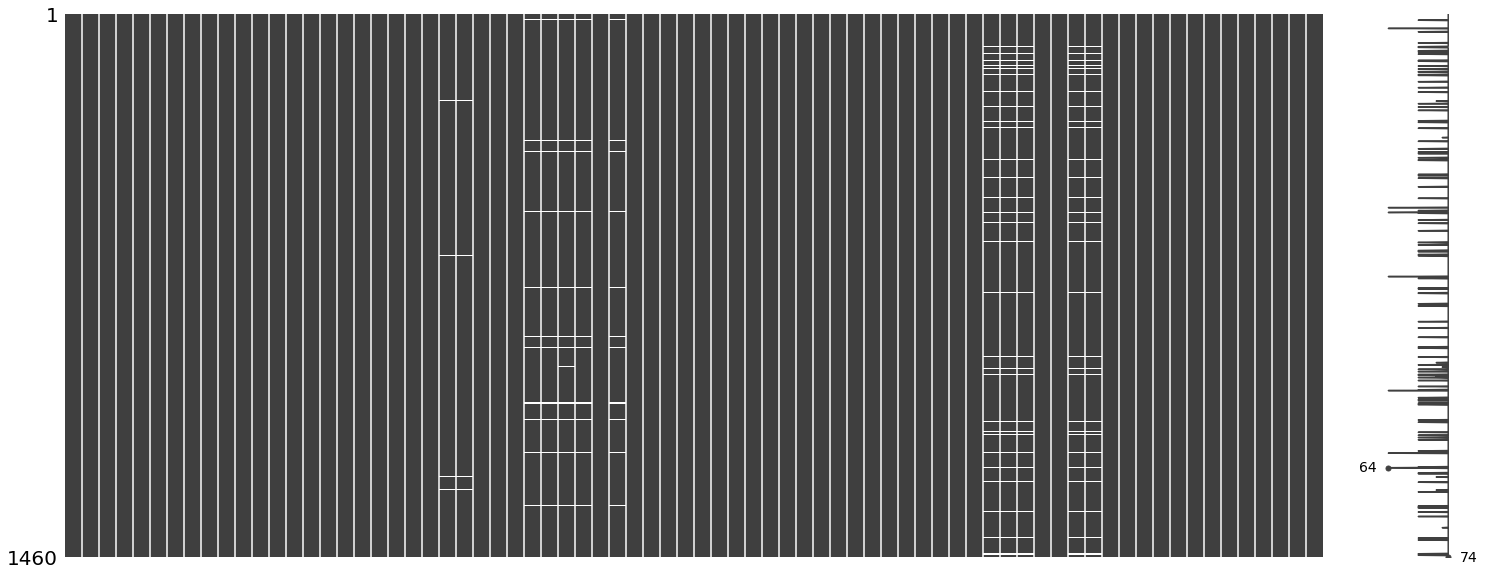

In [10]:
msno.matrix(df)

### I choose to deal with null values as follows:
### Categorical variables are replaced using mode, and numerical variables are replaced using median.

In [11]:
numerical_dtypes = ['int64', 'float64']
categorical_dtypes = ['object']

In [12]:
numerical_imputer = imputer(strategy='median', missing_values=np.nan)
categorical_imputer = imputer(strategy = 'most_frequent', missing_values=np.nan)

In [13]:
print(numerical_imputer)
print(categorical_imputer)

SimpleImputer(strategy='median')
SimpleImputer(strategy='most_frequent')


In [14]:
for col in df:
    if df[col].dtype in numerical_dtypes:
        #imputing numerical types
        temp_numerical_imputer = numerical_imputer.fit(df[[col]])
        df[[col]] = temp_numerical_imputer.transform(df[[col]])

    elif df[col].dtype in categorical_dtypes:
        #imputing categorical types
        temp_categorical_imputer = categorical_imputer.fit(df[[col]])
        df[[col]] = temp_categorical_imputer.transform(df[[col]])

<AxesSubplot:>

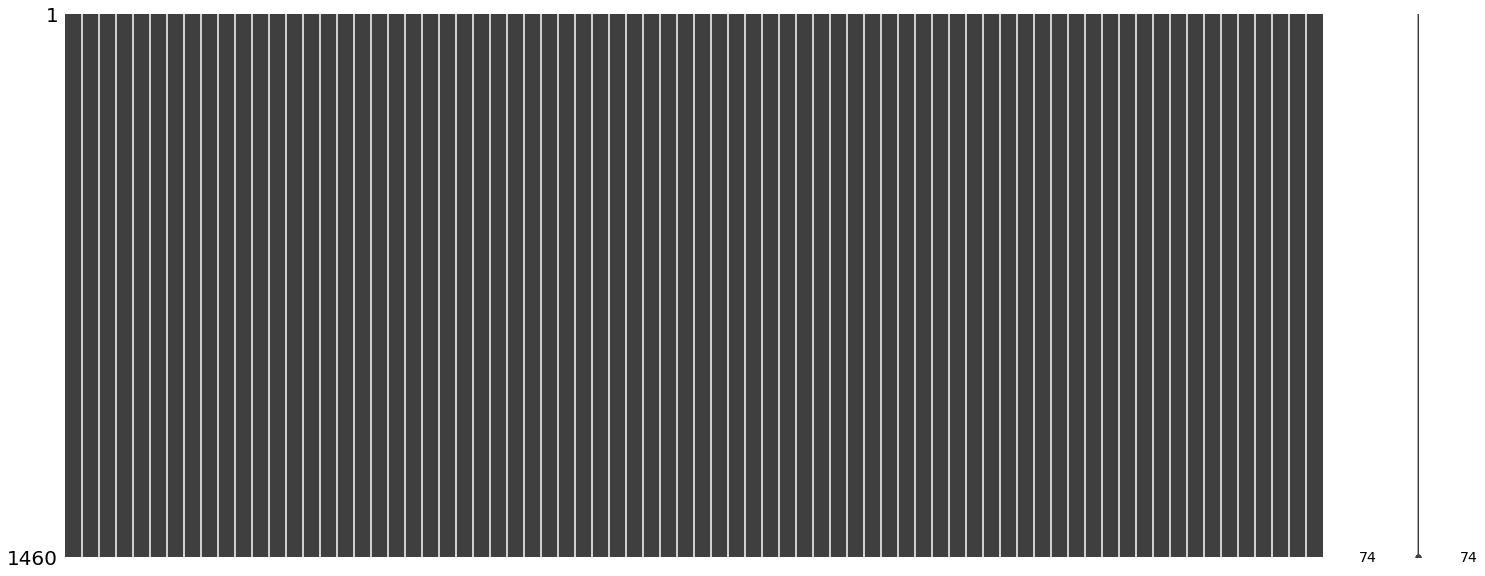

In [15]:
msno.matrix(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   float64
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   float64
 15  OverallCond    1460 non-null   float64
 16  YearBuilt      1460 non-null   float64
 17  YearRemodAdd   1460 non-null   float64
 18  RoofStyl

### Dealing with outliers.

In [17]:
dsc = df.describe()
dsc

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exploratory data analysis.

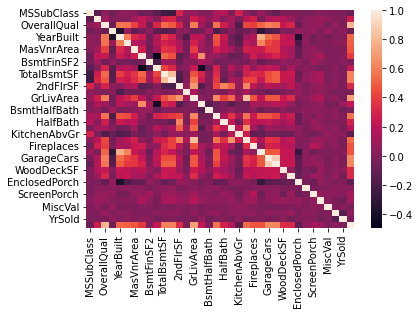

In [18]:
dataplot = sb.heatmap(df.corr())
mp.show()

# Encoding of categorical columns (One-Hot Encoding).

In [19]:
def one_hot_encoding(df, feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [20]:
for col in df:
    if df[col].dtype == 'object':
        df = one_hot_encoding(df, col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 270 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(36), uint8(234)
memory usage: 744.4 KB


In [21]:
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
X = df.drop(['SalePrice'], axis=1) #Independent variables
y = df['SalePrice']  #Dependent variable

# Feature selection.

In [23]:
#Calculating VIFs for each feature.
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

d:\Projects\Data Science - Machine Learning\house-prices\house-prices-venv\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [24]:
#If VIF > 5, then the column is eliminated due to excessive data multicollinearity.
for index, row in vif_data.iterrows():
    if row['VIF'] > 5:
        X = X.drop([row['feature']], axis=1)
print(X)

      LotArea  OverallCond  YearRemodAdd  MasVnrArea  BsmtFullBath  \
0      8450.0          5.0        2003.0       196.0           1.0   
1      9600.0          8.0        1976.0         0.0           0.0   
2     11250.0          5.0        2002.0       162.0           1.0   
3      9550.0          5.0        1970.0         0.0           1.0   
4     14260.0          5.0        2000.0       350.0           1.0   
...       ...          ...           ...         ...           ...   
1455   7917.0          5.0        2000.0         0.0           0.0   
1456  13175.0          6.0        1988.0       119.0           1.0   
1457   9042.0          9.0        2006.0         0.0           0.0   
1458   9717.0          6.0        1996.0         0.0           1.0   
1459   9937.0          6.0        1965.0         0.0           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0 

# Linear Regression.

#### Linear Regression accuracy: 65.8%

In [25]:
X.head()

,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,8450.0,5.0,2003.0,196.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,9600.0,8.0,1976.0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,11250.0,5.0,2002.0,162.0,1.0,0.0,2.0,1.0,3.0,1.0,1.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,9550.0,5.0,1970.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,14260.0,5.0,2000.0,350.0,1.0,0.0,2.0,1.0,4.0,1.0,1.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [26]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
X_test.describe()

,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,9825.571918,5.537671,1984.739726,102.630137,0.424658,0.058219,1.517123,0.386986,2.770548,1.041096,0.592466,87.434932,34.986301,22.414384,1.797945,13.674658,1.972603,12.376712,6.184932,2007.804795
std,5886.343498,1.100743,20.321997,209.988054,0.515540,0.248779,0.565061,0.515300,0.852783,0.198853,0.643507,106.111686,50.049184,57.199562,17.941206,55.333233,33.707850,79.339770,2.832078,1.351941
min,1491.000000,2.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,7315.000000,5.000000,1968.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,9008.500000,5.000000,1992.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,26.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,11256.250000,6.000000,2003.250000,145.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,168.000000,53.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,70761.000000,9.000000,2010.000000,1600.000000,2.000000,2.000000,3.000000,2.000000,6.000000,2.000000,3.000000,466.000000,274.000000,318.000000,238.000000,396.000000,576.000000,600.000000,12.000000,2010.000000


In [29]:
linear_regression_model = LinearRegression()

In [30]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = linear_regression_model.predict(X_test)
y_pred

array([129511.74374102, 287405.41403806,  97595.12585748, 168800.37912423,
       236010.61870368, 113379.54797967, 227665.21562804, 175301.21349683,
       111869.20656648, 128483.9902936 , 133915.79847726, 116089.9511745 ,
        81765.44119444, 182469.27713906, 212050.20595411, 150697.78086003,
       213926.12447811, 129031.89076002, 102528.63030883, 216955.49997702,
       218977.02497723, 186245.12729937, 208107.70253935, 153606.256585  ,
       186338.50624862, 159001.40716559, 180449.96507053,  79544.13113063,
       203331.11940455, 205271.35840222, 122731.27886188, 277525.75383472,
       237453.69617278,  80004.66102107, 243242.98674233, 157059.02643902,
       141142.15776106, 215906.91599643, 241418.61331048,  87466.69258979,
       107072.90384417, 251817.96548434,  97957.42562589, 247821.16879178,
       116150.54656437, 124880.00653108,  91484.34088302, 111357.56684412,
       309953.60428837, 118416.71403336,  81423.61474173, 223495.76699064,
       142014.05161472, 1

In [32]:
score = r2_score(y_test, y_pred)
print('R2 score is: ', score)
print('Mean squared error is: ', mean_squared_error(y_test, y_pred))
print('Root mean squared error is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score is:  0.658408230121887
Mean squared error is:  2620120304.6555233
Root mean squared error is:  51187.11072775571


# Decision Tree Regression.

## Decision Tree Regression accuracy: 60.03%.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
decision_tree_regression_model = DecisionTreeRegressor(random_state = 42)
decision_tree_regression_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
y_pred = decision_tree_regression_model.predict(X_test)
y_pred

array([134800., 290000., 100000., 144000., 215000.,  86000., 325624.,
       148500.,  91000., 154000., 171000., 124500.,  80000., 167500.,
       208300., 130000., 179000., 130000., 100000., 214500., 104900.,
       266500., 227000., 130000., 184900., 172400., 173900.,  83000.,
       194500., 146000., 133700., 255500., 430000., 105500., 130500.,
       105000.,  81000., 179000., 267000., 105500., 149000., 192000.,
       125000., 314813., 129900., 166000., 148000., 116500., 354000.,
       168500., 119000., 172500., 155000., 197000., 145150., 202900.,
       190000., 185000., 130000., 132000.,  72500., 143500., 302000.,
       385000., 218000., 215000., 103000., 336000., 125000., 168500.,
       118964., 125000., 110000.,  87500., 306000.,  90350., 236000.,
       313000., 140000., 110000.,  91500.,  76000.,  84500., 134900.,
       148000., 105000., 252000., 140000., 145150., 179665., 140000.,
       166000., 110000., 197000., 100000., 170000., 208300., 160000.,
       270000., 2050

In [46]:
score = r2_score(y_test, y_pred)
print('R2 score is: ', score)
print('Mean squared error is: ', mean_squared_error(y_test, y_pred))
print('Root mean squared error is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score is:  0.6003965488534707
Mean squared error is:  3065088823.8116436
Root mean squared error is:  55363.2443396487


## Visualising the model's decision making.

In [47]:
export_graphviz(decision_tree_regression_model, out_file ='tree.dot',
               feature_names = []) 

ValueError: Length of feature_names, 0 does not match number of features, 20